# An Exploratory Data Analysis on Movie Data by Nathaniel Green

In [67]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import cpi

In [68]:
# importing movie budget data
budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [69]:
#Transforming budget and gross columns in integers
budgets.loc[:,["production_budget", 'domestic_gross', 'worldwide_gross']] = budgets.loc[:,["production_budget", 'domestic_gross', 'worldwide_gross']].applymap(lambda x: int(x.replace('$','').replace(",", "")))
budgets.loc[:,["production_budget", 'domestic_gross', 'worldwide_gross']] = budgets.loc[:,["production_budget", 'domestic_gross', 'worldwide_gross']].applymap(lambda x: x/1000000)
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425.0000,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350.0000,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6000,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,0.0070,0.000000,0.000000
5778,79,"Apr 2, 1999",Following,0.0060,0.048482,0.240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,0.0050,0.001338,0.001338
5780,81,"Sep 29, 2015",A Plague So Pleasant,0.0014,0.000000,0.000000


In [70]:
budgets.release_date = pd.to_datetime(budgets.release_date)

In [71]:
#creating profit columns to see the return on budget investment for each movie
budgets["profit_worldwide"] = budgets["worldwide_gross"] - budgets["production_budget"]
budgets["profit_domestic"] = budgets["domestic_gross"] - budgets["production_budget"]
budgets["profit_international"] = (budgets["worldwide_gross"] - budgets["domestic_gross"]) - budgets["production_budget"]
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_worldwide,profit_domestic,profit_international
0,1,2009-12-18,Avatar,425.0000,760.507625,2776.345279,2351.345279,335.507625,1590.837654
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000
2,3,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-200.237650,-307.237650,-243.000000
3,4,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,1072.413963,128.405868,613.408095
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,999.721747,303.181382,379.540365
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000,-0.007000
5778,79,1999-04-02,Following,0.0060,0.048482,0.240495,0.234495,0.042482,0.186013
5779,80,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662,-0.005000
5780,81,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400,-0.001400


In [72]:
budgets['Month'] = budgets.release_date.dt.month
budgets["Year"] = budgets.release_date.dt.year
budgets["Day"] = budgets.release_date.dt.dayofweek
Day = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
    
}

budgets["Day"] = budgets["Day"].map(Day)


In [73]:
budgets["adjusted_profit_ww"] = budgets.apply(lambda x: cpi.inflate(x["profit_worldwide"], x["Year"]), axis = 1)
budgets["adjusted_budget"] = budgets.apply(lambda x: cpi.inflate(x["production_budget"], x["Year"]), axis = 1)
budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_worldwide,profit_domestic,profit_international,Month,Year,Day,adjusted_profit_ww,adjusted_budget
0,1,2009-12-18,Avatar,425.0000,760.507625,2776.345279,2351.345279,335.507625,1590.837654,12,2009,Friday,2969.856157,536.794352
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000,5,2011,Friday,765.021887,494.624240
2,3,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-200.237650,-307.237650,-243.000000,6,2019,Friday,-212.231216,370.963830
3,4,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,1072.413963,128.405868,613.408095,5,2015,Friday,1226.038687,377.958889
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,999.721747,303.181382,379.540365,12,2017,Friday,1105.150954,350.430361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000,-0.007000,12,2018,Monday,-0.007554,0.007554
5778,79,1999-04-02,Following,0.0060,0.048482,0.240495,0.234495,0.042482,0.186013,4,1999,Friday,0.381399,0.009759
5779,80,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662,-0.005000,7,2005,Wednesday,-0.005081,0.006937
5780,81,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400,-0.001400,9,2015,Tuesday,-0.001601,0.001601


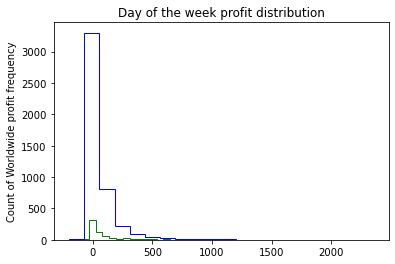

In [74]:
fig, ax = plt.subplots()

w_profit = budgets.loc[budgets["Day"] == "Wednesday", 'profit_worldwide']
f_profit = budgets.loc[budgets["Day"] == "Friday", 'profit_worldwide']

ax.hist(w_profit, bins = 20, histtype = 'step', color = 'green')
ax.hist(f_profit, bins = 20, histtype = 'step', color = 'blue')

ax.set_xlabel('')
ax.set_ylabel('Count of Worldwide profit frequency' )
ax.set_title('Day of the week profit distribution')


plt.show()

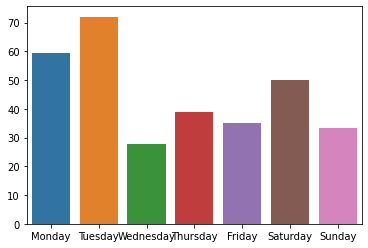

In [75]:
mon_per = (len(budgets.loc[(budgets["Day"]=="Monday") & (budgets["profit_worldwide"]< 0)])/len(budgets.loc[(budgets["Day"]=="Monday")])) *100
tues_per = (len(budgets.loc[(budgets["Day"]=="Tuesday") & (budgets["profit_worldwide"]< 0)])/len(budgets.loc[(budgets["Day"]=="Tuesday")])) *100
wed_per = (len(budgets.loc[(budgets["Day"]=="Wednesday") & (budgets["profit_worldwide"]< 0)])/len(budgets.loc[(budgets["Day"]=="Wednesday")])) *100
thur_per = (len(budgets.loc[(budgets["Day"]=="Thursday") & (budgets["profit_worldwide"]< 0)])/len(budgets.loc[(budgets["Day"]=="Thursday")])) *100
fri_per = (len(budgets.loc[(budgets["Day"]=="Friday") & (budgets["profit_worldwide"]< 0)])/len(budgets.loc[(budgets["Day"]=="Friday")])) *100
sat_per = (len(budgets.loc[(budgets["Day"]=="Saturday") & (budgets["profit_worldwide"]< 0)])/len(budgets.loc[(budgets["Day"]=="Saturday")])) *100
sun_per = (len(budgets.loc[(budgets["Day"]=="Sunday") & (budgets["profit_worldwide"]< 0)])/len(budgets.loc[(budgets["Day"]=="Sunday")])) *100
percent_loss = [mon_per, tues_per, wed_per, thur_per, fri_per, sat_per, sun_per]
week_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
loss = percent_loss

sns.barplot(x = week_day, y = loss, data = budgets)
plt.show()



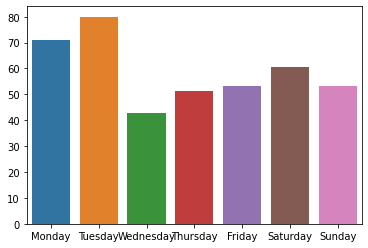

In [76]:
mon_per = (len(budgets.loc[(budgets["Day"]=="Monday") & (budgets["profit_domestic"]< 0)])/len(budgets.loc[(budgets["Day"]=="Monday")])) *100
tues_per = (len(budgets.loc[(budgets["Day"]=="Tuesday") & (budgets["profit_domestic"]< 0)])/len(budgets.loc[(budgets["Day"]=="Tuesday")])) *100
wed_per = (len(budgets.loc[(budgets["Day"]=="Wednesday") & (budgets["profit_domestic"]< 0)])/len(budgets.loc[(budgets["Day"]=="Wednesday")])) *100
thur_per = (len(budgets.loc[(budgets["Day"]=="Thursday") & (budgets["profit_domestic"]< 0)])/len(budgets.loc[(budgets["Day"]=="Thursday")])) *100
fri_per = (len(budgets.loc[(budgets["Day"]=="Friday") & (budgets["profit_domestic"]< 0)])/len(budgets.loc[(budgets["Day"]=="Friday")])) *100
sat_per = (len(budgets.loc[(budgets["Day"]=="Saturday") & (budgets["profit_domestic"]< 0)])/len(budgets.loc[(budgets["Day"]=="Saturday")])) *100
sun_per = (len(budgets.loc[(budgets["Day"]=="Sunday") & (budgets["profit_domestic"]< 0)])/len(budgets.loc[(budgets["Day"]=="Sunday")])) *100
percent_loss = [mon_per, tues_per, wed_per, thur_per, fri_per, sat_per, sun_per]
week_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
loss = percent_loss

sns.barplot(x = week_day, y = loss, data = budgets)
plt.show()

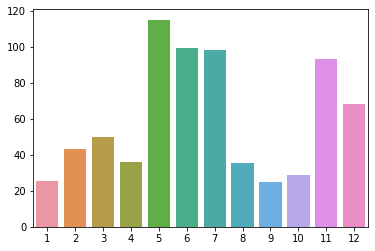

In [77]:
#Bar graph looking at average net gross per month
budgets_dict = budgets.groupby("Month").mean()["profit_worldwide"].to_dict()
x = [k for k,v in budgets_dict.items()]
y = [v for k,v in budgets_dict.items()]

sns.barplot(x = x, y = y, data = budgets)
plt.show()

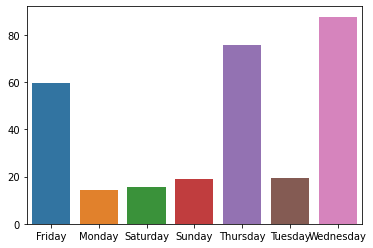

In [78]:

budgets_dict = budgets.groupby("Day").mean()["profit_worldwide"].to_dict()
day = [k for k,v in budgets_dict.items()]
profit = [v for k,v in budgets_dict.items()]

sns.barplot(x = day, y = profit, data = budgets)
plt.show()

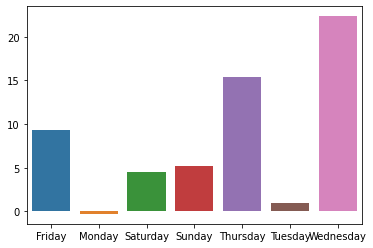

In [79]:
budgets_dict = budgets.groupby("Day").mean()["profit_domestic"].to_dict()
day = [k for k,v in budgets_dict.items()]
profit_domestic = [v for k,v in budgets_dict.items()]

sns.barplot(x = day, y = profit_domestic, data = budgets)
plt.show()

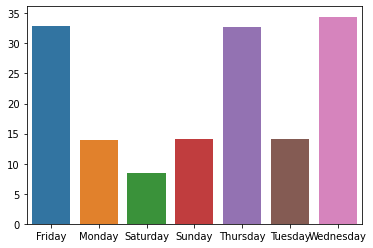

In [80]:
budgets_dict = budgets.groupby("Day").mean()["production_budget"].to_dict()
day = [k for k,v in budgets_dict.items()]
budget = [v for k,v in budgets_dict.items()]

sns.barplot(x = day, y = budget, data = budgets)
plt.show()

In [81]:
conn = sqlite3.connect('data/im2.db')
cursor_obj = conn.cursor()

basics = pd.read_sql("""
SELECT*
FROM movie_basics;

""", conn)

basics.drop(columns =["original_title", "movie_id", "start_year"], inplace = True)
basics = basics.rename(columns = {"primary_title": "movie"})
basics

,movie,runtime_minutes,genres
0,Sunghursh,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,The Other Side of the Wind,122.0,Drama
3,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
...,...,...,...
146139,Kuambil Lagi Hatiku,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
146141,Dankyavar Danka,NaN,Comedy
146142,6 Gunn,116.0,None


In [82]:
basic_budget = pd.merge(budgets, basics, how="left", on = "movie")
basic_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_worldwide,profit_domestic,profit_international,Month,Year,Day,adjusted_profit_ww,adjusted_budget,runtime_minutes,genres
0,1,2009-12-18,Avatar,425.0000,760.507625,2776.345279,2351.345279,335.507625,1590.837654,12,2009,Friday,2969.856157,536.794352,93.0,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000,5,2011,Friday,765.021887,494.624240,136.0,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-200.237650,-307.237650,-243.000000,6,2019,Friday,-212.231216,370.963830,113.0,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,1072.413963,128.405868,613.408095,5,2015,Friday,1226.038687,377.958889,141.0,"Action,Adventure,Sci-Fi"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,999.721747,303.181382,379.540365,12,2017,Friday,1105.150954,350.430361,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000,-0.007000,12,2018,Monday,-0.007554,0.007554,77.0,"Horror,Sci-Fi,Thriller"
7217,79,1999-04-02,Following,0.0060,0.048482,0.240495,0.234495,0.042482,0.186013,4,1999,Friday,0.381399,0.009759,NaN,NaN
7218,80,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662,-0.005000,7,2005,Wednesday,-0.005081,0.006937,NaN,NaN
7219,81,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400,-0.001400,9,2015,Tuesday,-0.001601,0.001601,76.0,"Drama,Horror,Thriller"


In [103]:
bb_cg = basic_budget.dropna(subset = ["genres"])
bb_cg.loc[: ,"genres"] = bb_cg.loc[: , "genres"].apply(lambda x: str(x).split(","))
explode = bb_cg.explode("genres")

/Users/nathanielgreen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [104]:
explode["genres"].value_counts()

Drama          1817
Comedy          842
Action          710
Thriller        594
Documentary     499
Adventure       490
Horror          415
Crime           398
Romance         372
Mystery         249
Biography       248
Sci-Fi          229
Family          204
Fantasy         202
Animation       148
History          96
Music            87
Sport            75
War              53
Musical          35
Western          25
News              7
Reality-TV        1
Name: genres, dtype: int64

In [85]:
explode["genres"].replace("Action", "Action/Adventure", inplace = True)
explode["genres"].replace("Adventure", "Action/Adventure", inplace = True)
explode["genres"].replace("Music", "Musical", inplace = True)

In [106]:
explode["genres"].replace("News", np.nan, inplace = True)
explode["genres"].replace("Reality-TV ", np.nan, inplace = True)
explode.dropna(subset = ["genres"], inplace =True)

In [87]:
explode["ROI"] = (explode["adjusted_profit_ww"]/explode["adjusted_budget"])*100

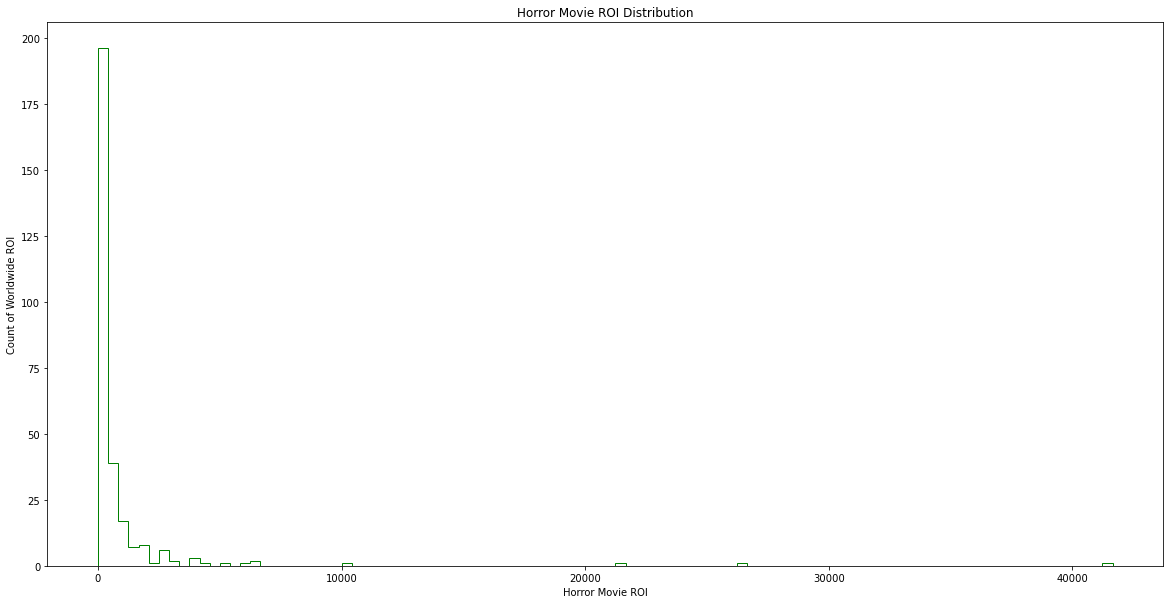

In [281]:
fig, ax = plt.subplots(figsize = (20,10))

horror = explode.loc[explode["genres"] == "Horror", 'ROI']

ax.hist(horror, bins = 100, histtype = 'step', color = 'green')
 
ax.set_xlabel('Horror Movie ROI')
ax.set_ylabel('Count of Worldwide ROI' )
ax.set_title('Horror Movie ROI Distribution')


plt.show()

In [88]:
explode

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_worldwide,profit_domestic,profit_international,Month,Year,Day,adjusted_profit_ww,adjusted_budget,runtime_minutes,genres,ROI
0,1,2009-12-18,Avatar,425.0000,760.507625,2776.345279,2351.345279,335.507625,1590.837654,12,2009,Friday,2969.856157,536.794352,93.0,Horror,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000,5,2011,Friday,765.021887,494.624240,136.0,Action/Adventure,154.667286
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000,5,2011,Friday,765.021887,494.624240,136.0,Action/Adventure,154.667286
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000,5,2011,Friday,765.021887,494.624240,136.0,Fantasy,154.667286
2,3,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-200.237650,-307.237650,-243.000000,6,2019,Friday,-212.231216,370.963830,113.0,Action/Adventure,-57.210757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000,-0.007000,12,2018,Monday,-0.007554,0.007554,77.0,Sci-Fi,-100.000000
7216,78,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000,-0.007000,12,2018,Monday,-0.007554,0.007554,77.0,Thriller,-100.000000
7219,81,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400,-0.001400,9,2015,Tuesday,-0.001601,0.001601,76.0,Drama,-100.000000
7219,81,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400,-0.001400,9,2015,Tuesday,-0.001601,0.001601,76.0,Horror,-100.000000


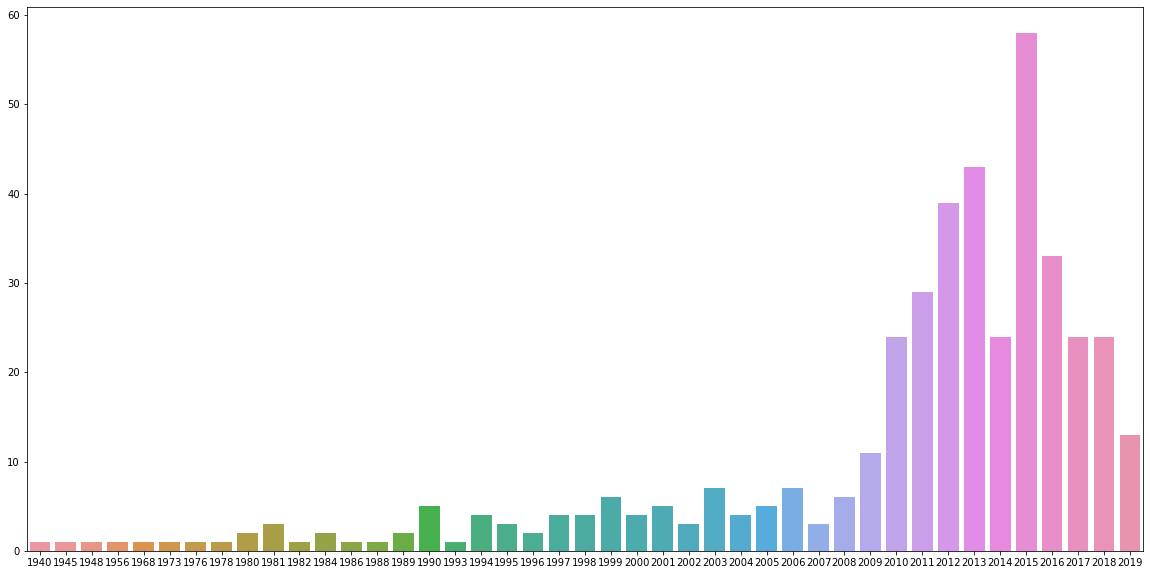

In [35]:
horror_hist = sorted(explode.loc[explode["genres"] == "Horror", "Year"].value_counts().to_dict().items())
x = [x[0] for x in horror_hist]
y = [x[1] for x in horror_hist]
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = x, y = y, data = explode);


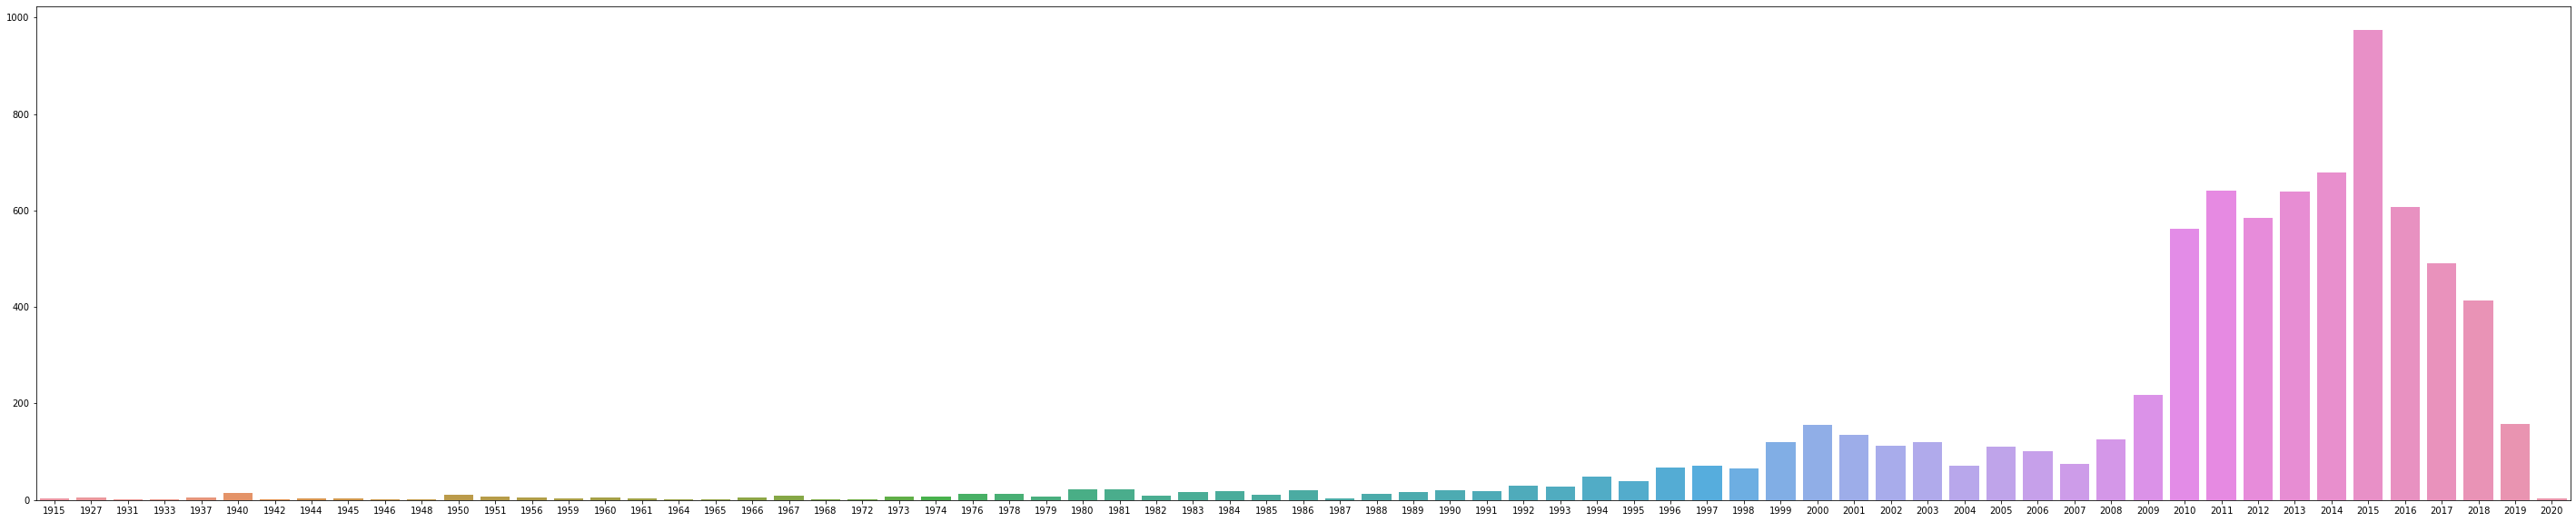

In [36]:
movie_per_year = sorted(explode.groupby("Year")["id"].count().to_dict().items())
x1 = [x[0] for x in movie_per_year]
y1 = [x[1] for x in movie_per_year]
fig, ax = plt.subplots(figsize = (50,10))
sns.barplot(x = x1, y = y1, data = explode);

In [89]:
explode.sort_values("ROI", ascending = False).head(40)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_worldwide,profit_domestic,profit_international,Month,Year,Day,adjusted_profit_ww,adjusted_budget,runtime_minutes,genres,ROI
7102,80,2015-07-10,The Gallows,0.100,22.764410,41.656474,41.556474,22.664410,18.792064,7,2015,Friday,47.509494,0.114325,81.0,Horror,41556.474000
7102,80,2015-07-10,The Gallows,0.100,22.764410,41.656474,41.556474,22.664410,18.792064,7,2015,Friday,47.509494,0.114325,81.0,Thriller,41556.474000
7102,80,2015-07-10,The Gallows,0.100,22.764410,41.656474,41.556474,22.664410,18.792064,7,2015,Friday,47.509494,0.114325,81.0,Mystery,41556.474000
6648,47,1942-08-13,Bambi,0.858,102.797000,268.000000,267.142000,101.939000,164.345000,8,1942,Thursday,4440.948941,14.263329,58.0,Documentary,31135.431235
6648,47,1942-08-13,Bambi,0.858,102.797000,268.000000,267.142000,101.939000,164.345000,8,1942,Thursday,4440.948941,14.263329,58.0,Biography,31135.431235
7099,77,1968-10-01,Night of the Living Dead,0.114,12.087064,30.087064,29.973064,11.973064,17.886000,10,1968,Tuesday,233.385091,0.887660,79.0,Horror,26292.161404
6493,11,1976-11-21,Rocky,1.000,117.235147,225.000000,224.000000,116.235147,106.764853,11,1976,Sunday,1066.736028,4.762214,136.0,Action/Adventure,22400.000000
6493,11,1976-11-21,Rocky,1.000,117.235147,225.000000,224.000000,116.235147,106.764853,11,1976,Sunday,1066.736028,4.762214,136.0,Comedy,22400.000000
6493,11,1976-11-21,Rocky,1.000,117.235147,225.000000,224.000000,116.235147,106.764853,11,1976,Sunday,1066.736028,4.762214,136.0,Drama,22400.000000
6494,11,1976-11-21,Rocky,1.000,117.235147,225.000000,224.000000,116.235147,106.764853,11,1976,Sunday,1066.736028,4.762214,NaN,Action/Adventure,22400.000000


In [107]:
average_rating = explode.groupby("genres").mean()["ROI"].to_dict()
x = [k for k,v in average_rating.items()]
y = [v for k,v in average_rating.items()]

fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = x, y = y, data = explode)
plt.show()

KeyError: 'ROI'

In [109]:
average_rating = explode.groupby("genres").quantile(q=0.50)["ROI"].to_dict()
x = [k for k,v in average_rating.items()]
y = [v for k,v in average_rating.items()]

fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = x, y = y, data = explode)
plt.show()

KeyError: 'ROI'

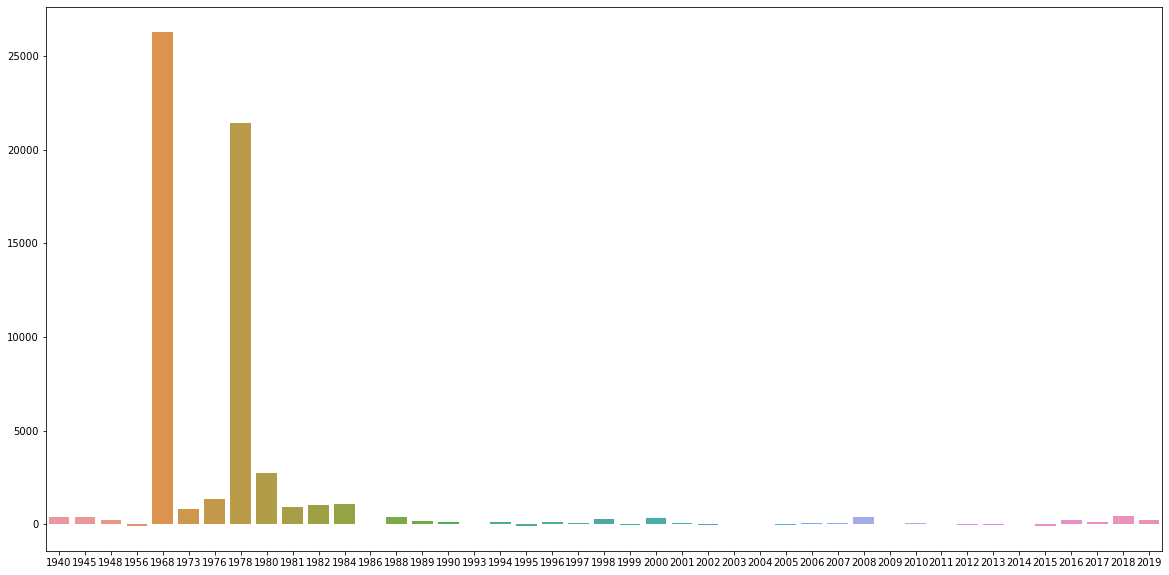

In [93]:
horror_ROI = sorted(explode.loc[explode["genres"]=="Horror"].groupby("Year").quantile(q=0.50)["ROI"].to_dict().items())

x2 = [x[0] for x in horror_ROI]
y2 = [x[1] for x in horror_ROI]

fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = x2, y = y2, data = explode)
plt.show()

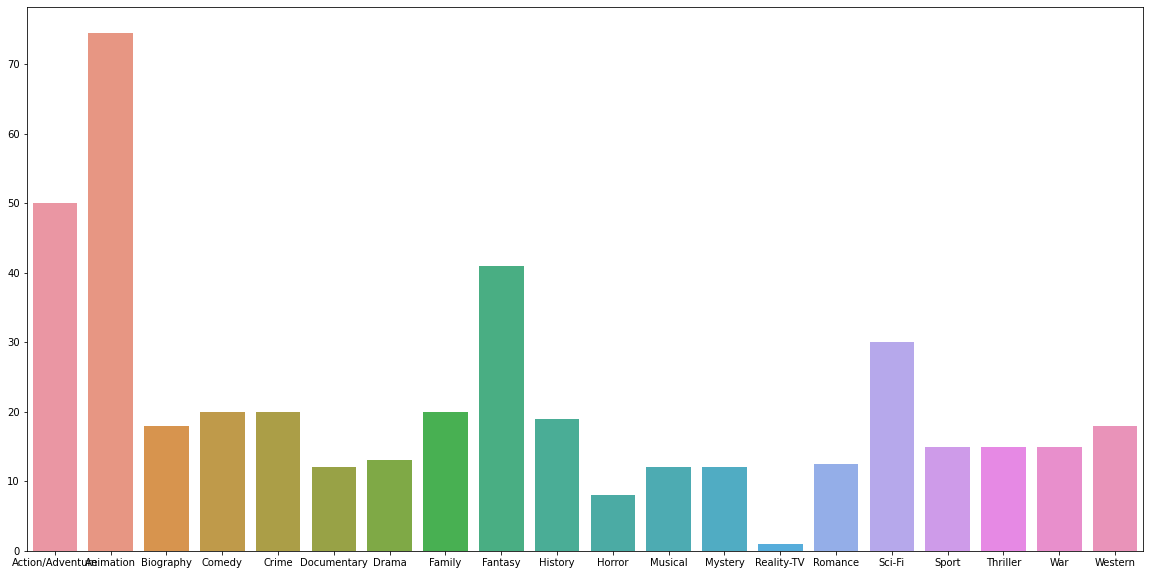

In [94]:
average_rating = explode.groupby("genres").quantile(q=0.50)["production_budget"].to_dict()
x = [k for k,v in average_rating.items()]
y = [v for k,v in average_rating.items()]

fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = x, y = y, data = explode)
plt.show()

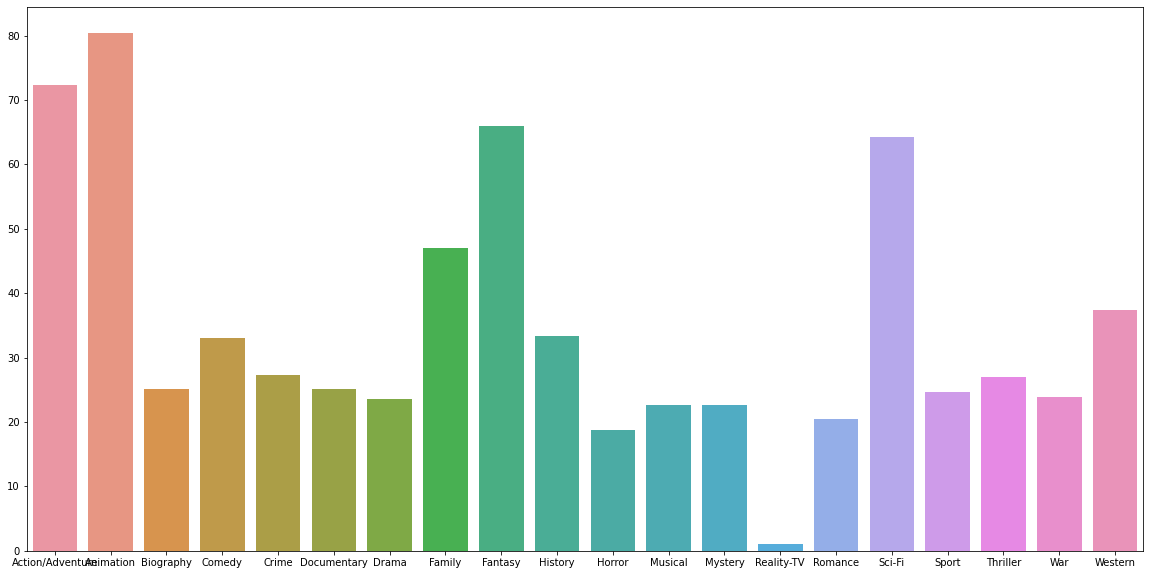

In [95]:
average_rating = explode.groupby("genres").mean()["production_budget"].to_dict()
x = [k for k,v in average_rating.items()]
y = [v for k,v in average_rating.items()]

fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = x, y = y, data = explode)
plt.show()

In [96]:
runtime = explode.dropna(subset = ["runtime_minutes"])
runtime

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_worldwide,profit_domestic,profit_international,Month,Year,Day,adjusted_profit_ww,adjusted_budget,runtime_minutes,genres,ROI
0,1,2009-12-18,Avatar,425.0000,760.507625,2776.345279,2351.345279,335.507625,1590.837654,12,2009,Friday,2969.856157,536.794352,93.0,Horror,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000,5,2011,Friday,765.021887,494.624240,136.0,Action/Adventure,154.667286
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000,5,2011,Friday,765.021887,494.624240,136.0,Action/Adventure,154.667286
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,635.063875,-169.536125,394.000000,5,2011,Friday,765.021887,494.624240,136.0,Fantasy,154.667286
2,3,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-200.237650,-307.237650,-243.000000,6,2019,Friday,-212.231216,370.963830,113.0,Action/Adventure,-57.210757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000,-0.007000,12,2018,Monday,-0.007554,0.007554,77.0,Sci-Fi,-100.000000
7216,78,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000,-0.007000,12,2018,Monday,-0.007554,0.007554,77.0,Thriller,-100.000000
7219,81,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400,-0.001400,9,2015,Tuesday,-0.001601,0.001601,76.0,Drama,-100.000000
7219,81,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400,-0.001400,9,2015,Tuesday,-0.001601,0.001601,76.0,Horror,-100.000000


In [97]:
top_genres = runtime.loc[(runtime["genres"] == "Horror") | (runtime["genres"] == "Thriller")| (runtime["genres"] == "Mystery") | (runtime["genres"] == "Action/Adventure")]



<AxesSubplot:xlabel='runtime_minutes', ylabel='profit_international'>

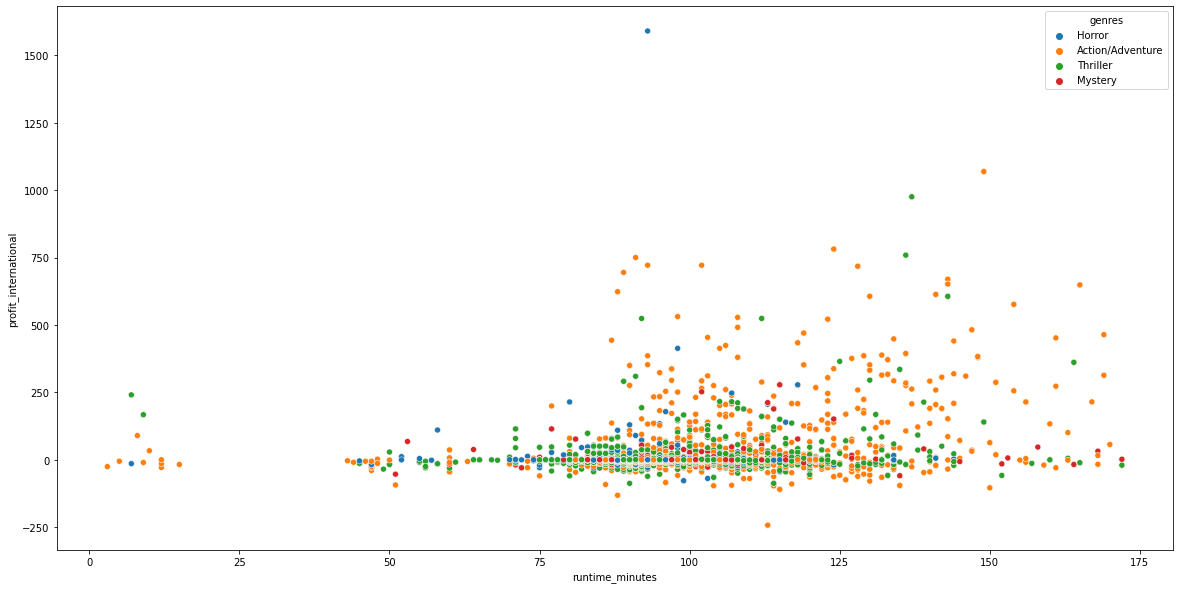

In [98]:
fig, ax = plt.subplots(figsize = (20,10))
sns.scatterplot(data=top_genres, x=top_genres["runtime_minutes"], y=top_genres["profit_international"], hue="genres")

In [99]:
top_genres.groupby("genres")["profit_international","runtime_minutes"].corr()

<ipython-input-99-198e4942cce4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_genres.groupby("genres")["profit_international","runtime_minutes"].corr()


profit_international  runtime_minutes
genres                                                                      
Action/Adventure profit_international              1.000000         0.319116
                 runtime_minutes                   0.319116         1.000000
Horror           profit_international              1.000000         0.058336
                 runtime_minutes                   0.058336         1.000000
Mystery          profit_international              1.000000         0.136907
                 runtime_minutes                   0.136907         1.000000
Thriller         profit_international              1.000000         0.178269
                 runtime_minutes                   0.178269         1.000000